In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
def openImage(f):
    return cv2.imread(f)

### Avec entraînement sur MNIST et evaluation test sur images Loto

Problème -> Chiffres de 0 à 9, on a pas de 1 à 50

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

Nos images de Loto ayant été rognées en 70x70, on est obligés de resize / rescale les images MNIST qui sont de base en 28x28, en 70x70

In [4]:
tmp = []
for img in x_train:
    res = cv2.resize(img, dsize=(70, 70), interpolation=cv2.INTER_CUBIC)
    tmp.append(res)
    
tmp = np.array(tmp)
x_train = tmp

In [5]:
# You can either run this cell or the next one which loads the model already trained

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(70,70)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(51, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.save('handwritten.model')

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2304 - accuracy: 0.9310
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1040 - accuracy: 0.9673
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0728 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0586 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0463 - accuracy: 0.9850
INFO:tensorflow:Assets written to: handwritten.model/assets


INFO:tensorflow:Assets written to: handwritten.model/assets


In [9]:
# model = tf.keras.models.load_model("handwritten.model")

In [10]:
x_test = []
y_test = []

for classe in range(1,51):
    for num in range(1,10):
        if os.path.isfile(f"ImagesRognees/num{classe}/{classe}_num_{num}.jpg"):
            img = openImage(f"ImagesRognees/num{classe}/{classe}_num_{num}.jpg")[:,:,0]
            img = np.invert(np.array([img]))
            x_test.append(img[0])
            y_test.append(classe)
            
x_test = np.array(x_test)
y_test = np.array(y_test)

L'entraînement sur MNIST a été fait, on essaye d'évaluer sur nos images.

In [14]:
loss, accuracy = model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 4ms/step - loss: 10676.1055 - accuracy: 0.0315


Accuracy extrêmement faible...

In [15]:
len(x_test)

254

1/1 [==============================] - 0s 15ms/step


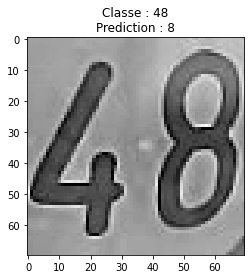

In [22]:
# On a 254 images qu'on a extraites à la main
c = np.random.randint(0,254)
img = x_test[c]
img = np.array([img])

prediction = model.predict(img)
plt.imshow(img[0], cmap=plt.cm.binary)
plt.title(f"Classe : {y_test[c]}\nPrediction : {np.argmax(prediction)}")
plt.show()

### Entraînement sur nos propres images de loto

In [23]:
x_train = []
y_train = []

for classe in range(1,51):
    for num in range(1,10):
        if os.path.isfile(f"ImagesRognees/num{classe}/{classe}_num_{num}.jpg"):
            img = openImage(f"ImagesRognees/num{classe}/{classe}_num_{num}.jpg")[:,:,0]
            img = np.invert(np.array([img]))
            x_train.append(img[0])
            y_train.append(classe)
            
x_train = np.array(x_train)
y_train = np.array(y_train)

In [24]:
# You can either run this cell or the next one which loads the model already trained

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(70,70)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(51, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.save('loto.model')

Epoch 1/5
8/8 [==============================] - 1s 17ms/step - loss: 945.3817 - accuracy: 0.0197
Epoch 2/5
8/8 [==============================] - 0s 8ms/step - loss: 479.9460 - accuracy: 0.0157
Epoch 3/5
8/8 [==============================] - 0s 9ms/step - loss: 150.5999 - accuracy: 0.0276
Epoch 4/5
8/8 [==============================] - 0s 9ms/step - loss: 33.4721 - accuracy: 0.0157
Epoch 5/5
8/8 [==============================] - 0s 7ms/step - loss: 3.9315 - accuracy: 0.0197
INFO:tensorflow:Assets written to: loto.model/assets


INFO:tensorflow:Assets written to: loto.model/assets


Toujours une très faible accuracy après l'entraînement...

In [25]:
# En essayant d'évaluer sur les images d'entraînement même (pas très pertinent de base, mais toujours une très faible accuracy)
model.evaluate(x_train, y_train)

8/8 [==============================] - 0s 4ms/step - loss: 3.9314 - accuracy: 0.0197


[3.9313879013061523, 0.019685039296746254]

1/1 [==============================] - 0s 43ms/step


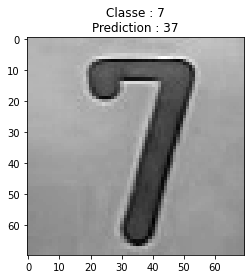

In [26]:
# Test sur une image
img = openImage(f"ImagesRognees/imagesTest/7_test.jpg")[:,:,0]
img = np.invert(np.array([img]))
prediction = model.predict(img)
plt.imshow(img[0], cmap=plt.cm.binary)
plt.title(f"Classe : {7}\nPrediction : {np.argmax(prediction)}")
plt.show()